In [1]:
import numpy as np
import utils 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from imp import reload
reload(utils)

<module 'utils' from '/home/user/conv-nets/utils.py'>

A single-layered neural net is simply a set of weights 

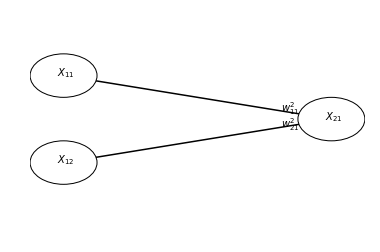

In [3]:
_ = utils.draw_neural_net([2, 1])

In [4]:
x11 = 1 
x12 = 2
w_2_11 = -2
w_2_21 = 3

In [5]:
x21 = w_2_11 * x11 + w_2_21 * x12

In [6]:
print(x21)

4


In [7]:
x21 = np.dot([w_2_11, w_2_21], [x11, x12])

In [8]:
print(x21)

4


A multi-layered network will add to that another set of weights: 

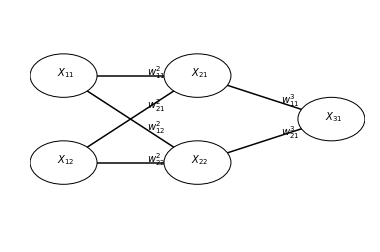

In [9]:
_ = utils.draw_neural_net([2, 2, 1])

In [10]:
x11 = 1 
x12 = 2

w_2_11 = -2
w_2_21 = 3
w_2_12 = 2
w_2_22 = -3

w_3_11 = 3
w_3_21 = 2

In [11]:
x21 = np.dot([w_2_11, w_2_21], [x11, x12])
x22 = np.dot([w_2_12, w_2_22], [x11, x12])

x31 = np.dot([w_3_11, w_3_21], [x21, x22])

In [12]:
print(x31)

4


Things get more interesting when an activation function is added to each unit:

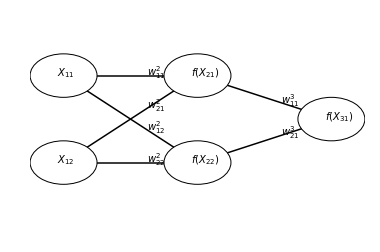

In [13]:
_ = utils.draw_neural_net([2, 2, 1], draw_funcs=True)

Different functions that are used include the hyperbolic tangent:

In [14]:
x = np.arange(-np.pi, np.pi, 0.001)

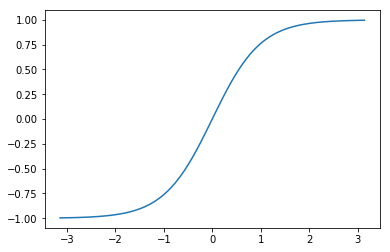

In [15]:
plt.plot(x, np.tanh(x))

Another function that has been used a lot, for both convenience, and because it induces sparsity, is a rectified linear unit:

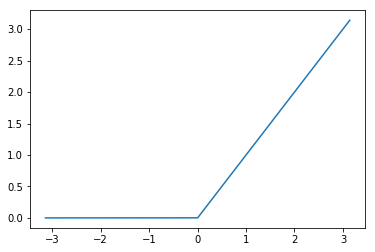

In [16]:
plt.plot(x, np.max([x, np.zeros(x.shape[0])], axis=0))

In [17]:
x21 = np.max([np.dot([w_2_11, w_2_21], [x11, x12]), 0])
x22 = np.max([np.dot([w_2_12, w_2_22], [x11, x12]), 0])

x31 = np.max([np.dot([w_3_11, w_3_21], [x21, x22]), 0])

In [18]:
print(x31)

12


Networks are trained through gradient descent: gradual changes to the values of the weights

The gradients are calculate through **backpropagation**

Error is propagated back through the network to calculate a gradient (derivative) for each weight by multiplying:

- The gradient of the loss function with respect to the node a weight feeds into
- The value of the node feeding into the weight
- Ths slope of the activation function of the node it feeds into



For example, for the network we had above, let's assume the desired output was 10, instead of 12

In [19]:
# We take the simplest possible error, the absolute difference:
e31 = x31 - 10

# We'll use this helper function to derive ReLU functions:
def d_relu(x):
    if x > 0:
        return 1
    else:
        return 0

e_3_11 = e31 * x21 * d_relu(x31)
e_3_21 = e31 * x22 * d_relu(x31)

e_2_11 = e_3_11 * x11 * d_relu(x21)
e_2_21 = e_3_11 * x12 * d_relu(x21)

e_2_12 = e_3_21 * x11 * d_relu(x22)
e_2_22 = e_3_21 * x12 * d_relu(x22)


In [20]:
lr = 0.01

In [21]:
w_3_11 = w_3_11 - e_3_11 * lr 
w_3_21 = w_3_11 - e_3_21 * lr 

w_2_11 = w_2_11 - e_2_11 * lr
w_2_12 = w_2_12 - e_2_12 * lr

w_2_21 = w_2_21 - e_2_21 * lr
w_2_22 = w_2_22 - e_2_22 * lr

In [22]:
x21 = np.max([np.dot([w_2_11, w_2_21], [x11, x12]), 0])
x22 = np.max([np.dot([w_2_12, w_2_22], [x11, x12]), 0])

x31 = np.max([np.dot([w_3_11, w_3_21], [x21, x22]), 0])

In [23]:
print(x31)

10.511999999999999


As we'll see next, depending on the error function that is used, neural nets can be used for other tasks as well